# **Deteccion de transacciones fraudulentas**
## Aprendizaje No Supervisado
##### Alejandro Barrientos; Omar Alejandro Henao; Luis Miguel Caicedo


Las transacciones fraudulentas en la industria bancaria se han convertido parte del paisaje diario que enfrentan los bancos. Estas transacciones fraudulentas son una forma ilegal de usar datos de la tarjeta de crédito sin el conocimiento del titular real de la tarjeta. Normalmente esto sucede cuando una tarjeta de crédito o su informacion confidencial es robada. 
Usalmente estas situaciones se resuelven cuando el titular de la tarjeta hace una reclamacion a su banco. El banco o la compañía de la tarjeta de crédito realizan una investigación y devuelven el dinero al titular de la tarjeta.

Pero, si podemos detectar las transacciones fraudulentas en tiempo real, podemos tomar las medidas necesarias para detenerlas.
Esto evitaría miles de reclamaciones, papeleos y perdida de recursos que terminan en manos agenas.

Las transacciones fraudulentes son atipicos dentro del conjunto de transacciones diarias. Esto debido a que la mayoría de las transacciones realizadas en la industria son legales, por lo que las transacciones fraudulentas son muy pocas dentro del conjunto de transacciones diarias.

Para la deteccion de atipicos hay metodos de aprendizaje no supervisado que son utiles como:

(i) Isolation forest;

(ii) Local Outlier Factor (LOF);

A continuacion se presentan estos algoritmos de aprendizaje no supervisado con un set de datos de transacciones bancarias.
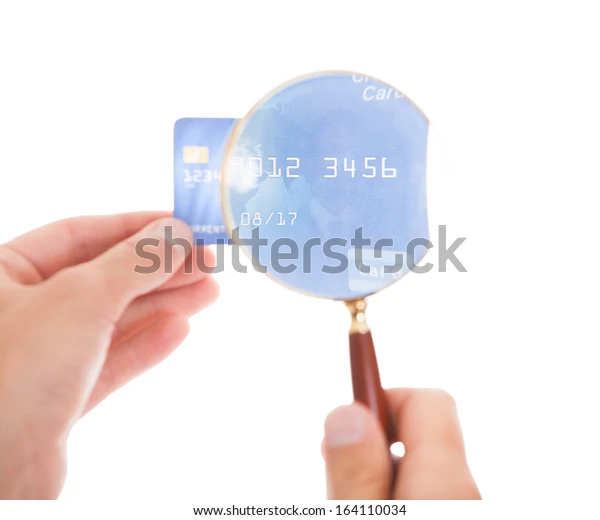

### **(0) Set de datos:**

#### _Librerias basicas:_

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt

#### _Importe de set de datos:_

In [2]:
transaction_data = pd.read_csv("credit_card_transactional_data.csv")
transaction_data.head(10)

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,152212.22220,1.816,13.245219,NaN,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,159074.44440,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,NaN,0.062966,0.130546,-0.303582,NaN,NaN,0
2,43127.77778,24.000,-9.067399,0.762501,NaN,0.052481,-0.101681,-88.000000,0.117912,NaN,0.358812,-0.367016,NaN,361.000000,0
3,156042.22220,8.000,8.728304,-0.382673,NaN,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,NaN,-1.654373,0
4,154720.00000,59.496,7.657141,0.150611,NaN,-0.034883,0.826100,0.357556,0.147640,NaN,0.080491,-0.693792,-0.308631,0.563570,0
5,37515.55556,7.192,-6.944700,-0.136388,0.543172,-0.024708,0.112116,1.647884,-0.003729,0.039702,0.097664,-0.341836,-274.000000,-0.056484,0
6,34078.88889,10.320,133.000000,-0.540177,8.803812,-0.007307,-67.000000,1.709944,-0.316351,-0.003741,0.187718,NaN,0.338621,0.227839,0
7,58923.33333,1.584,-0.670264,-0.164626,-8.848897,0.002278,0.078981,1.143923,-472.000000,0.010555,0.065275,0.029735,-0.396261,-0.182626,0
8,166341.11110,100.000,1.984216,0.416604,-178.000000,-0.003641,53.000000,NaN,0.109451,0.022316,-0.039217,0.438853,-0.184313,0.643273,0
9,175154.44440,0.712,5.857276,-0.073466,0.667938,-0.000891,-0.012069,1.427191,-101.000000,-0.038324,0.014183,-0.109039,0.420946,-61.000000,0


#### _Revision y ajuste del set de datos:_

(1) Que tan balanceado esta el set de datos? 

Para esto podemos revisar la columna "class" y contar cuantos registros hay de cada clase.

In [3]:
transaction_data['Class'].value_counts()

0    139747
1       253
Name: Class, dtype: int64

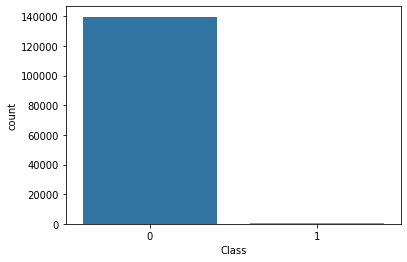

In [4]:
sns.countplot(x='Class',data=transaction_data)

Los resultados indican que no hay un buen balance entre las diferentes clases. Teniendo la clase 0 el 99.8% de los datos y clase 1 aproximadamente el 0.2%.

(2) Cuales son los estadiscos descriptivos de los datos?

In [5]:
transaction_data.describe()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
count,140000.000000,140000.000000,116232.000000,129731.000000,129693.000000,140000.000000,129678.000000,116529.000000,125595.000000,129645.000000,140000.000000,129891.000000,125695.000000,125833.000000,140000.000000
mean,105334.592698,71.102883,-13.647954,-15.797094,-16.141105,0.000037,-15.540173,-13.681959,-14.760374,-16.067148,0.000119,-16.029764,-15.500080,-15.491673,0.001807
std,52763.641695,212.359700,224.599903,72.631165,74.585111,0.031540,72.120519,230.871123,235.313604,73.148242,0.215636,73.378542,237.289210,236.485713,0.042472
min,0.000000,0.000000,-2000.000000,-500.000000,-500.000000,-0.212540,-500.000000,-2000.000000,-1999.000000,-500.000000,-1.544515,-500.000000,-1998.000000,-2000.000000,0.000000
25%,60107.500002,4.400000,-6.419730,-0.262951,-9.288367,-0.017731,-0.205542,-1.149444,-0.108129,-0.033800,-0.143551,-0.509781,-0.277642,-0.596404,0.000000
50%,94276.111110,17.584000,-1.250014,-0.019520,-1.739613,-0.000140,0.000903,0.279868,0.023023,-0.005629,0.003731,-0.062414,-0.019975,0.007491,0.000000
75%,154845.833375,61.522000,5.063801,0.220734,6.436411,0.017776,0.206203,1.092373,0.109777,0.022194,0.140835,0.327266,0.224548,0.507399,0.000000
max,191985.555600,20552.928000,2000.000000,100.000000,196.401291,0.278668,100.000000,1999.000000,1998.000000,100.000000,0.858579,100.000000,2000.000000,1999.000000,1.000000


Los estadisticos basicos nos indican la diferente dimensionalidad de las diferentes variables medidas en cada registro.

(3) Cuantos registros tienen datos nulos?

In [6]:
# Esto se puede hacer de dos maneras:
# 1ra Opcion: identifacando el numero de registros otales y cuales variables tienen menos de esos registros. 
# La diferencia entre el numero total de registros y los no nulos, es igual a los registros nulos.
# En este caso el numero de registros totales es igual a 140 mil.
# Para la variable C1 hay 116232 registros no nulos. Por lo tanto hay 23768 registros nulos.
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  140000 non-null  float64
 1   Value      140000 non-null  float64
 2   C1         116232 non-null  float64
 3   C2         129731 non-null  float64
 4   C3         129693 non-null  float64
 5   C4         140000 non-null  float64
 6   C5         129678 non-null  float64
 7   C6         116529 non-null  float64
 8   C7         125595 non-null  float64
 9   C8         129645 non-null  float64
 10  C9         140000 non-null  float64
 11  C10        129891 non-null  float64
 12  C11        125695 non-null  float64
 13  C12        125833 non-null  float64
 14  Class      140000 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 16.0 MB


In [7]:
# 2da opcion: identificando con codigo cuantos registros no nulos hay.
# Efectivamente C1 tiene 23768 registros nulos.
transaction_data.isnull().sum()

Timestamp        0
Value            0
C1           23768
C2           10269
C3           10307
C4               0
C5           10322
C6           23471
C7           14405
C8           10355
C9               0
C10          10109
C11          14305
C12          14167
Class            0
dtype: int64

(4) Ajustando los registros nulos con valores de estadistico robusto como la mediana para que el set de datos no se vea afectado por los outliers:

In [8]:
transaction_data = transaction_data.fillna(transaction_data.median())

In [9]:
transaction_data.isnull().sum()

Timestamp    0
Value        0
C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
C9           0
C10          0
C11          0
C12          0
Class        0
dtype: int64

(5) Correlacion entre variables:

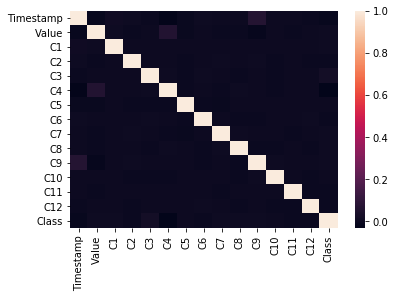

In [10]:
sns.heatmap(transaction_data.corr())

La correlacion entre variables es baja (<0.3), por lo que se puede afirmar que este set de datos esta compuesto por variables independientes.

In [11]:
#pd.plotting.scatter_matrix(transaction_data)
#plt.show()

In [12]:
#transaction_data.corr()
#Con esta linea de codigo se puede ver la matrix de correlaciones entre variables si se requiere.

### **(i) Isolation Forest:**

Isolation forest ( o bosque de aislamiento) es similar a Random Forest (o bosque aleatorio) que se crean con base en árboles de decisión.

Este algoritmo hace parte del aprendizaje no supervisado porque no utiliza etiquetas predefinidas.

Isolation forest se construye con base en las anomalías (o valores atípicos; pocos y diferentes) de un data set.

En un bosque de aislamiento, los datos submuestreados aleatoriamente se procesan en una estructura de árbol basada en características seleccionadas aleatoriamente.


Al adentrarnos en el arbol de decisión, es menos probable que la submuestra estudiada tenga una anomalía. Esto debido a que cada vez se requieren mas cortes para aislar las anomalías. 

Si una anomalía es indentificada despues de varias ramificaciones, es porque era un inlier (dato atipico interior dificil de aislar). 

Si las ramas para identificar un atipico son cortas indican anomalías faciles de detectar (o outliers). Estas son relativamente mas faciles de separarlas de otras observaciones.

#### _Librerias requeridas:_

In [13]:
from sklearn.ensemble import IsolationForest
from scipy.stats import kurtosis
from scipy.stats import skew

#### _Calculo de Contaminacion:_

Para poder utilizar Isolation forest se requiere calcular la cantidad de contaminacion dentro del set de datos. 

La contaminacion se refiere a cuantas transacciones fraudulentas hay en el set de datos por cada transaccion validad o legal. 

$ Contamination = Fraud/Valid$

In [14]:
Fraud = transaction_data[transaction_data['Class']==1]

Valid = transaction_data[transaction_data['Class']==0]

contamination = len(Fraud)/float(len(Valid))

In [15]:
print("Contamination : {}".format(round(contamination,4)))

print("Fraud Class : {}".format(len(Fraud)))

print("Valid Class : {}".format(len(Valid)))

Contamination : 0.0018
Fraud Class : 253
Valid Class : 139747


#### _Modelacion con Isolation Forest:_

In [16]:
X = transaction_data.drop('Class',axis=1)
# Aqui seleccionamos como 'X' todas las variables del dataframe excepto 'Class' que sera nuestra 'y'.

In [17]:
y = transaction_data['Class']
# Aqui definimos 'Class' como 'y'.

In [18]:
clf = IsolationForest(n_estimators=500, max_samples=len(X),contamination=0.0018)
# En esta linea se entrena el modelo.
# n_estimators: Es el numero de arboles de decision que se quiere realizar. 100 es el numero de arboles predeterminado.
# max_samples: El número de muestras para extraer de X para entrenar cada estimador base; se puede colocar un porcentaje del total de
# muestras posibles de X o el 100%; en este caso puntual se podra todos los posibles de X que son 140 mil.

# Cuando no se tiene la contaminación definida, se debe definir un valor segun la industri en la que se este trabajando.
# En otras palabras depende del conocimiento que se tenga de la industria. En caso de desconocimiento el valor de la contaminacion
# puede estar entre (0; 0.5]. Es decir 50% maximo de contaminacion.

In [19]:
clf.fit(X)
# En esta linea se evalua el modelo sobre el set de datos.


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.0018,
                max_features=1.0, max_samples=140000, n_estimators=500,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [20]:
scores_prediction = clf.decision_function(X)

In [21]:
np.shape(scores_prediction)

(140000,)

In [22]:
print(scores_prediction)

[0.15882495 0.13662078 0.14218831 ... 0.14150513 0.16831416 0.16324851]


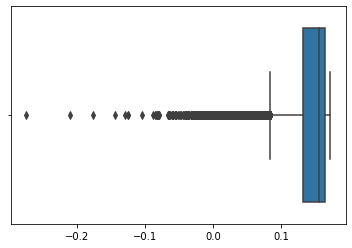

In [23]:
sns.boxplot(scores_prediction)
# En este grafico de cajas de bigotes, muestra como los datos atipicos tienen scores menores 0.09.
# Los atipicos son todos los puntos negros a la izquierda del valor minimo.
# Si los scores son altos entonces la transaccion es valida (es una transaccion normal)
# Si lo scores son bajos entonces la transaccion se considera como una anomalia (es un atipico).

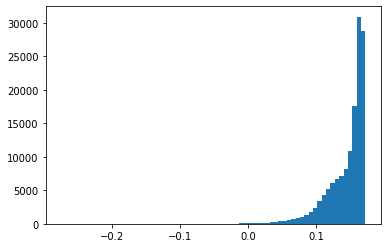

In [24]:
plt.hist(scores_prediction,bins=70)
plt.show()

In [25]:
print('Asimetria:', round(skew(scores_prediction),3))
print('Kurtosis:', round(kurtosis(scores_prediction),3))

Asimetria: -1.984
Kurtosis: 5.871


Estos resultados de asimetria y kurtosis confirman la presencia de atipicos a la izquierda del grupo de scores calculados.

In [26]:
transaction_data['scores'] = scores_prediction
# Aqui adicionamos la columna scores al data frame. 


In [27]:
#transaction_data

In [28]:
Outliers = transaction_data.query('scores< 0.0019')

In [29]:
len(Outliers)

280

In [30]:
Outliers.head(10)

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class,scores
718,1271.111111,7.992,4.693858,-404.000000,-78.000000,-0.015381,-0.082083,-406.000000,-0.039207,-406.000000,-0.024759,-1.009186,-0.019975,-1.414455,0,0.000053
910,45451.111110,0.792,-1826.000000,-0.032859,-7.865014,-0.012218,-433.000000,-0.792182,-0.005377,-0.007043,-0.374519,1.255514,-1792.000000,-0.287705,0,-0.041309
1398,105873.333300,15128.000,77.000000,-4.517892,-43.917155,0.268036,-15.840229,-8.221799,-19.583504,-0.329947,-0.810383,-0.712189,-3.985156,29.000000,0,-0.175373
1446,129866.666700,720.000,10.856407,-461.000000,6.782110,-0.002840,-0.812546,0.235329,-0.842303,-0.007872,-0.110698,-490.000000,492.000000,-0.114063,0,-0.028723
1519,41758.888890,60.064,-3.000000,-0.757108,-349.000000,0.028129,0.059588,0.469915,-335.000000,-343.000000,0.039154,-0.652869,1660.000000,0.318889,0,-0.003994
1596,7543.333333,0.712,-2.074055,91.000000,-419.000000,0.015368,0.000903,1.335144,0.071893,-425.000000,-0.356277,-0.260871,-0.434156,-0.087704,0,-0.003202
1611,22106.666670,4.000,-8.100358,-64.000000,-6.510508,-0.035290,-369.000000,0.897993,0.000454,-128.000000,-0.259163,-0.318267,1367.000000,-1313.000000,0,-0.053483
2059,19497.777780,78.608,-7.116478,-161.000000,19.893521,0.010254,-0.059996,-92.000000,0.009430,-136.000000,-0.528427,-353.000000,-0.318476,995.000000,0,-0.018312
2139,23740.000000,9.480,-1.250014,0.453043,2.166856,-0.027850,-458.000000,-4.525698,1028.000000,-216.000000,-0.362709,-0.916299,-0.019975,1.094322,0,0.001175
2264,145181.111100,8.000,1970.000000,0.278985,-4.790441,-0.040439,-0.147053,66.000000,1990.000000,-0.049036,0.329513,-0.794143,1254.000000,-0.383082,0,-0.054360


Finalmente encontramos que el algoritmo de Isolation Forest encontra un valor entre 250 - 290 posibles anomalias en el set de datos (Valor mayor a los atipicos previamente identificados que son 253). 

Para mejorar la deteccion de atipicos, se debe afinar la definicion del score minimo que define como atipica una transaccion. 

Otra forma de aproximarse con Isolation forest puede ser dividiendo X en entrenamiento y prueba:

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2)

In [32]:
clf = IsolationForest(n_estimators=500, max_samples=len(X_train),contamination=0.0018)

In [33]:
clf.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.0018,
                max_features=1.0, max_samples=112000, n_estimators=500,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [34]:
y_train = clf.predict(X_train)
y_test = clf.predict(X_test)

In [35]:
y_train_pd = pd.DataFrame(y_train)
y_train_pd['Class'] = pd.DataFrame(y_train)
y_train_pd['Class'].value_counts()

 1    111798
-1       202
Name: Class, dtype: int64

In [36]:
y_test_pd = pd.DataFrame(y_test)
y_test_pd['Class'] = pd.DataFrame(y_test)
y_test_pd['Class'].value_counts()

 1    27945
-1       55
Name: Class, dtype: int64

En este caso el modelo entrenado apunta que en el set de datos en total hay 257 transacciones atipicas (o anomalias).
El valor detectado de datos atipicos es mucho mas cercano al real, teniendo una diferencia de solo 4 datos.

### **(ii) LOF:**

Local Outlier factor (LOF) es un algoritmo de aprendizaje automático no supervisado que identifica valores atípicos con respecto a los vecindarios locales, en lugar de utilizar la distribución asociada a los datos. 

LOF se basa en un concepto de densidad local, que es calculada con base en las distancias de un punto _A_ a sus _k_ vecinos más cercanos. Al comparar la densidad del punto _A_ con las densidades de sus vecinos, se pueden identificar regiones de densidad similar y puntos que tienen una densidad sustancialmente menor que sus vecinos. 

Estos ultimos, con densidad menor, se consideran valores atípicos.


La densidad local se estima utilizando la "distancia de accesibilidad". Esta se define como el máximo entre de dos distacias: (i) la distancia entre dos puntos _A_ y _B_; y (ii) la _k_-distancia(_A_) (distancia del objeto _A_ a su _k_-ésimo vecino más cercano).

Para los puntos dentro de una aglomeracion (o cluster) se considera la distancia _k_. Mientras que para los puntos fuera del cluster, se considera la distancia entre puntos.

Aquí se calculan las distancias de accesibilidad a todos los _k_ vecinos más cercanos de un punto para determinar la densidad de accesibilidad local (LRD en ingles) de ese punto.

LRD es una medida de la densidad de _k_-puntos más cercanos alrededor de un punto que se calcula dividiendo 1 sobre la suma de todas las distancias de accesibilidad de todos los _k_-puntos vecinos más cercanos.

Por lo tanto, cuanto más cerca están los puntos, la distancia es menor y la densidad es mayor.

El cálculo de LOF se realiza tomando la relación entre el promedio de los LRDs de _k_ número de vecinos de un punto y el LRD de ese punto.

Analisis del valor de LOF:

(i) Si LOF < 1, entonces el punto está dentro del grupo de densidad: Esto scuede si la densidad de los vecinos es menor que la densidad del punto;

(ii) Si LOF == 1, entonces el punto es muy similar a sus vecinos: Esto sucede cuando la densidad de los vecinos y el punto en evaluacion son casi iguales;

(iii) Si LOF > 1 , valor atípico: Esto sucede si la densidad de los vecinos es mayor que la densidad del punto.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

#### _Simulacion con parametros definidos por el usuario:_

In [54]:
#X

In [69]:
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

In [70]:
lof = LocalOutlierFactor(n_neighbors=30,contamination=0.0018)
# se asume un valor de vecinos igual a 30 para el calculo de las distancias.
# La contaminacion se uso el valor calculado previamente para Isolation Forest.

In [71]:
y_pred = lof.fit_predict(X)
# Se realiza la prediccion de outliers para el set de datos X.

In [72]:
len(y_pred)
# se valida que se haya calculado LOF para cada registro de X.

140000

In [73]:
X_array = X.to_numpy()
# Se convierte X en array para hallar las posiciones en las que LOF > 1

In [74]:
y_index = where(y_pred==-1)
outlier_values = X_array[y_index]
# Cuando LOF > 1 entonces el algoritmo los clasifica como -1

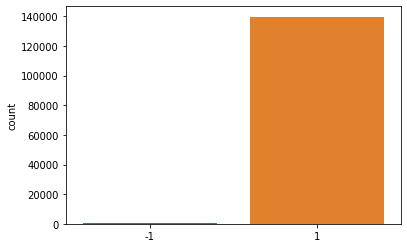

In [75]:
sns.countplot(y_pred)

In [76]:
np.shape(outlier_values)
# LOF detecto 252 datos atipicos. Comparado con los 253 que existen en el data set, es una excelent aproximacion. 
# LOF es mucho mas preciso que isolation forest en detectar la cantidad de datos atipicos presente.
# Esto se debe a que LOF calcula las distancias de accesibilidad de cada punto con sus vecinos mas cercanos y no se basa en una generalizacion 
# como el score minimo que puede ser impreciso para ciertos puntos.


(252, 14)

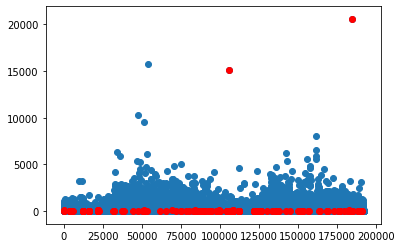

In [77]:
plt.scatter(X_array[:,0], X_array[:,1])
plt.scatter(outlier_values[:,0],outlier_values[:,1], color='r')
plt.show()
# En la siguiente grafica se muestran los puntos atipicos del data set estudiado con color rojo.

#### _Simulacion con parametros predeterminados y score de anomalias:_

In [46]:
y = transaction_data['Class']

In [47]:
lof = LocalOutlierFactor()
# En este caso se trabajara con los valores de vecinos (20) y contaminacion (auto) predeterminados por el algoritmo.

In [78]:
lof.fit_predict(X)
anomaly_scores = lof.negative_outlier_factor_
# Utilizando el atributo negative_outlier_factor_ se puede calcular un score para atipicos similar al que se obtiene con Isolation Forest.

In [49]:
np.shape(anomaly_scores)
# Aqui se comprueba que cada registro tenga su score.

(140000,)

In [85]:
print(min(anomaly_scores).round(3), max(anomaly_scores).round(3))

-63.033 -0.939


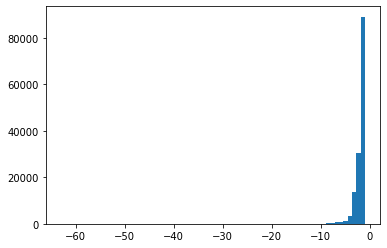

In [82]:
plt.hist(anomaly_scores,bins=70)
plt.show()

In [89]:
threshold = quantile(anomaly_scores, .02)
print(threshold.round(3))
# Al definir el umbral (o threshold) se establece desde que valor en los scores se empiezan a contar los datos como atipicos.
# El umbral se ve afectado por el % de contaminacion establecido (para este caso del 2%).

-4.905


In [90]:
index = where(anomaly_scores<=threshold)
outlier_values = X_array[index]
np.shape(outlier_values)
# Se nota como el numero de atipicos a aumentado considerablemente debido al % de contaminacion establecida.

(2800, 14)

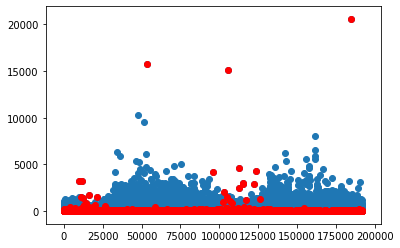

In [61]:
plt.scatter(X_array[:,0], X_array[:,1])
plt.scatter(outlier_values[:,0], outlier_values[:,1], color='r')
plt.show()
# En la grafica se nota como el numero de puntos rojos aumentaron cuando se trabaja con el score de anomalias.
# Esto resalta la importancia de definir el % de contaminacion de manera tal que simule la realidad del sector.


In [97]:
# Inmediatamente se cambia el % contaminacion cercano al real (0.18%), se obtiene el dato de atipicos previamente identificados (252).
threshold = quantile(anomaly_scores, .0018)
print(threshold.round(3))

-9.238


In [98]:
index = where(anomaly_scores<=threshold)
outlier_values = X_array[index]
np.shape(outlier_values)

(252, 14)

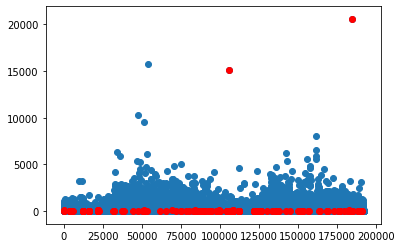

In [99]:
plt.scatter(X_array[:,0], X_array[:,1])
plt.scatter(outlier_values[:,0], outlier_values[:,1], color='r')
plt.show()

### **Comentarios finales**

(i) Isolation Forest y LOF son algoritmos muy utiles para deteccion de atipicos en un set de datos donde las variables son independientes.

(ii) LOF es mejor detectando el numero de atipicos mas cercano a la realidad debido a que se basa en distancias entre los vecinos mas cercanos y la densidad local.

(iii) Ambos algoritmos se pueden trabajar utilizando un score de atipicos. Sin embargo este score de atipicos es influenciado por el % de contaminacion.
Si se define un error de contaminacion alejado de la realidad del sector estudiado, lo mas probable es muchos datos sean seleccionados como atipicos que realmente no lo son.
Es sumamente importante conocer muy bien el sector estudiado para definir el % de cotaminacion lo mas cercano posible a la realidad.

